In [1]:
from sklearn.datasets import make_blobs
import numpy as np

blob_centers = np.array(
    [[0.2, 2.3],
     [-1.5, 2.3],
     [-2.8, 1.8],
     [-2.8, 2.8],
     [-2.8, 1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [2]:
import matplotlib.pyplot as plt

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

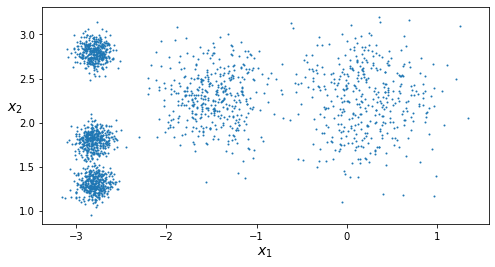

In [3]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

In [4]:
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

In [5]:
print(kmeans.inertia_, kmeans.score(X)) # Score is negative because greate = better rule.

211.59853725816834 -211.59853725816836


In [6]:
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-1.46679593,  2.28585348],
       [-2.79290307,  2.79641063],
       [-2.80037642,  1.30082566]])

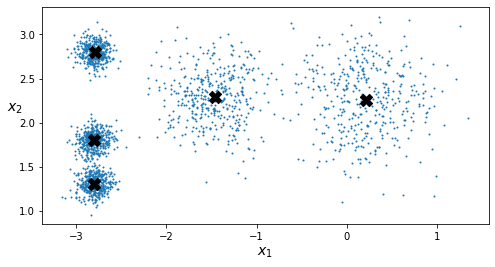

In [7]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', color='black', s=150)
plt.show()

In [8]:
from sklearn.cluster import MiniBatchKMeans
mini_kmeans = MiniBatchKMeans(n_clusters=5)
mini_kmeans.fit_predict(X)
print(mini_kmeans.inertia_, mini_kmeans.score(X))

220.87665575781315 -220.87665575781318


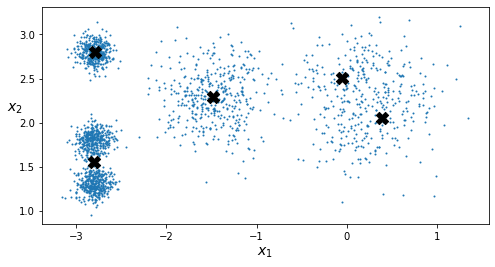

In [9]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.scatter(mini_kmeans.cluster_centers_[:, 0], mini_kmeans.cluster_centers_[:, 1], marker='X', color='black', s=150)
plt.show()

In [10]:
from sklearn.metrics import silhouette_score
silhouette_score(X, mini_kmeans.labels_)

0.6317791271336931

In [26]:
from matplotlib.image import imread
image = imread("ladybug.png")
image.shape

(533, 800, 3)

In [27]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

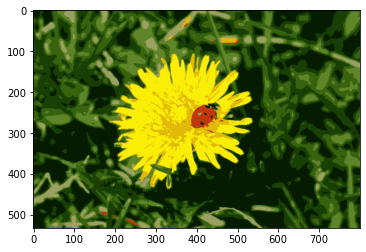

In [29]:
plt.imshow(segmented_img)

In [30]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

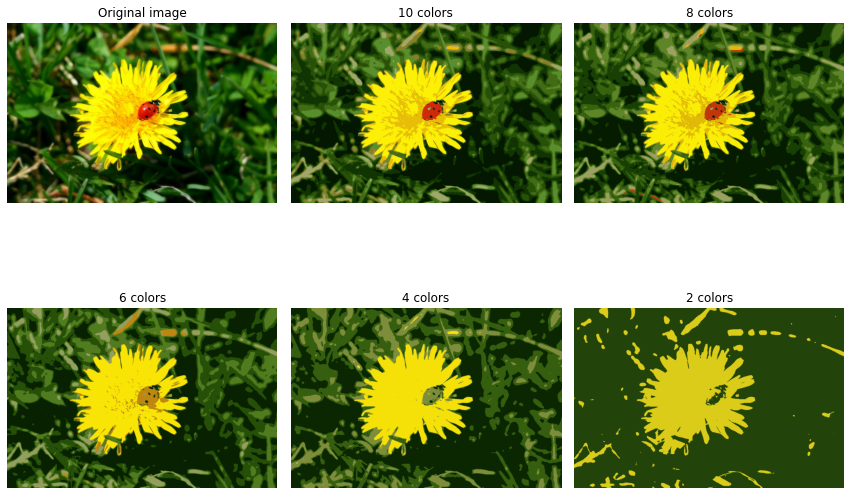

In [40]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

plt.show()

In [35]:
from sklearn.datasets import load_digits
X_digits, y_digits = load_digits(return_X_y=True)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

In [46]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42, n_jobs=-1)
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.9688888888888889

In [50]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50, random_state=42)),
    ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42, n_jobs=-1)),
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50, random_state=42)),
                ('log_reg',
                 LogisticRegression(max_iter=5000, multi_class='ovr', n_jobs=-1,
                                    random_state=42))])

In [51]:
pipeline.score(X_test, y_test)

0.9777777777777777

In [52]:
from sklearn.model_selection import GridSearchCV

param_grid = {"kmeans__n_clusters": range(2, 100)}
grid_clf = GridSearchCV(pipeline, param_grid, cv=3)
grid_clf.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans',
                                        KMeans(n_clusters=50, random_state=42)),
                                       ('log_reg',
                                        LogisticRegression(max_iter=5000,
                                                           multi_class='ovr',
                                                           n_jobs=-1,
                                                           random_state=42))]),
             param_grid={'kmeans__n_clusters': range(2, 100)})

In [53]:
grid_clf.best_params_

{'kmeans__n_clusters': 95}

In [54]:
grid_clf.score(X_test, y_test)

0.98

#### Semi-Supervised learning

In [ ]:
# n_labeled = 50
# log_reg = LogisticRegression(random_state=42)
# log_reg.fit()